## Travelling Salesman Problem (TSP) solved by Greedy Algorithm

旅行業務員問題(Traveling Salesman Problem)是個有名的難題，旅行業務員要到 n 個城市推展業務，n 個城市已 1,2,...,n 表示，從 1 出發， 只能經過每個城市一次，再回到 1，令 $C_{ij}$ 表城市 i 到城市 j 的旅行成本，問題為找出一個最小成本的路徑。

In [1]:
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import datetime

## 1. 定義常數與物件

In [2]:
NUMBER_OF_NODES = 20

MAX_X = 100
MAX_Y = 100

# 其他程式內重要變數:
# node_{index}: 根據 NUMBER_OF_NODES 生成每一個節點的 Class. 可以使用內部的 get_distance() 取得與其他節點的距離
# nodes: 存放所有節點的 list
# beginning_index: 起點的 index

距離計算函數

In [16]:
# Manhattan Distance by NumPy
def manhattan_distance(a, b):
    return np.sum(np.abs(a-b))

# Euclidean Distance by NumPy
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a-b)**2))

# Chebyshev Distance by NumPy
# 柴比雪夫距離通常使用於特定案例，例如在棋盤格中的兩點之間的距離，很難作為一般性的距離衡量使用。
def chebyshev_distance(a, b):
    return np.max(np.abs(a-b))

def get_distance_matrix(nodes):
    distance_matrix = []
    for node_i in nodes:
        distances = []
        for node_j in nodes:
            if node_i == node_j:
                distances.append(0)
            else:
                manhattan_distance = np.sum(np.abs(np.array(node_i) - np.array(node_j)))
                distances.append(manhattan_distance)
        distance_matrix.append(distances)
    return distance_matrix

定義物件類別

In [ ]:
nodes = []

class Node:
    def __init__(self, x, y, color, index):
        self.x = x
        self.y = y
        self.color = color
        self.coordinates = np.array([x, y])
        self.index = index
        self.distances = []
        self.passed = False

    def get_distances(self, nodes):
        dist_list = []
        _nodes = nodes.copy()
        for _node in _nodes:
            dist_list.append(manhattan_distance(self.coordinates, _node.coordinates))
        self.distances = dist_list
        # print(self.distances)
        return

# class Route:
    # 路徑長度計算方法, 繪圖方法

## 2. 定義演算法

In [13]:
# Greedy Algorithm for TSP
'''
1. 選擇起始點 start_node
2. 呼叫 distances 取得與其他 node 的距離
3. 選擇距離最短的 node, 並將該 node 的 index 加入 route
4. 走過的 node 不能再走
5. 重複執行 2, 3，直到最後一個 node
5. 回到原點 node_0
'''

def TSP_greedy_algorithm(start_index):
    
    route = []
    _nodes = nodes.copy()
    
    def do_iteration(node_index):
        _nodes[node_index].passed = True
        if len(route) == (len(_nodes) - 1):
            return
        else:
            _nodes[node_index].get_distances(_nodes)
            _distances = _nodes[node_index].distances.copy()
            # 不選擇 _distances 中已經走過的 node 位置, 有走過的話距離設為 99999999
            for i in range(len(_distances)):
                if _nodes[i].passed == True:
                    _distances[i] = 99999999
            next_index = _distances.index(min(_distances))
            route.append(next_index)
            return do_iteration(next_index)

    do_iteration(start_index)
    route.append(start_index)
    return route

In [14]:
# Brute Force Method
import itertools

def TSP_brute_force(start_index):
    print('起始點: Node', start_index)
    distance_matrix = get_distance_matrix(nodes)
    print('距離矩陣:', distance_matrix)
    node_list = list(range(0, NUMBER_OF_NODES))
    node_list.remove(start_index)
    permutations = list(itertools.permutations(node_list))
    print('路徑組合:', permutations)
    
    # 計算每個排列的總距離, 並找出最短距離
    total_distances = []
    for route in permutations:
        step = 0
        distance = 0
        while step < NUMBER_OF_NODES - 1:
            distance += distance_matrix[start_index][route[step]]if step == 0 else distance_matrix[route[step-1]][route[step]]
            step += 1
        else:
            distance += distance_matrix[route[step-1]][start_index]
        total_distances.append(distance)
    
    print('最短距離:',min(total_distances))
    # 找出最短距離的路徑, 由於有多組路徑距離相同, 因此使用 index() 找出第一個符合的路徑
    shortest_route = permutations[total_distances.index(min(total_distances))]
    shortest_route = shortest_route + (start_index,)
    print('最短路徑:', shortest_route)
    return shortest_route

定義執行函式

In [25]:
def generate_map(x, y):
    sns.set()
    plt.title("Travelling Salesman Problem")
    plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
    plt.xlim(0, x+5)
    plt.ylim(0, y+5)  
    return

def generate_nodes(numbers):
    for i in range(numbers):
        node = Node(rd.randint(0, MAX_X), rd.randint(0, MAX_Y), 'blue', i)
        nodes.append(node)
        globals()['node_' + str(i)] = node
    # 須檢查座標不能重複
    return

def set_beginning_node(index):
    globals()['beginning_index'] = index
    globals()['node_' + str(beginning_index)].color = 'red'
    return

def plot_nodes():
    for node in nodes:
        plt.scatter(x=node.x, y=node.y, color=node.color, s=400, edgecolors='black', alpha=0.8)
        plt.text(x=node.x, y=node.y, s=str(node.index), fontsize=10, color="white", horizontalalignment='center', verticalalignment='center')
    return

def get_optimal_route():
    # Choose an alogrithm to find the shortest route
    # return TSP_brute_force(beginning_index)
    return TSP_greedy_algorithm(beginning_index)

def plot_lines(route):

    arrow_kwargs = dict(length_includes_head=True, head_width=2, head_length=4, alpha=0.8, color='black')

    for i in range(len(route)):
        if i == 0:
            beginning_node = globals()['node_' + str(beginning_index)].coordinates
            end_node = globals()['node_' + str(route[i])].coordinates
            x_values = [beginning_node[0], end_node[0]]
            y_values = [beginning_node[1], end_node[1]]
            plt.arrow(x=beginning_node[0], y=beginning_node[1], dx=(end_node[0]-beginning_node[0]), dy=(end_node[1]-beginning_node[1]), **arrow_kwargs)
        elif i == len(route)-1:
            x_values = [end_node[0], beginning_node[0]]
            y_values = [end_node[1], beginning_node[1]]
            plt.arrow(x=end_node[0], y=end_node[1], dx=(beginning_node[0]-end_node[0]), dy=(beginning_node[1]-end_node[1]), **arrow_kwargs)
            break
        start_node = globals()['node_' + str(route[i])].coordinates
        end_node = globals()['node_' + str(route[i+1])].coordinates
        x_values = [start_node[0], end_node[0]]
        y_values = [start_node[1], end_node[1]]
        plt.arrow(x=start_node[0], y=start_node[1], dx=(end_node[0]-start_node[0]), dy=(end_node[1]-start_node[1]), **arrow_kwargs)
    return

主程式

[13, 11, 16, 7, 14, 1, 4, 6, 8, 15, 19, 2, 9, 3, 18, 17, 10, 12, 5, 0]


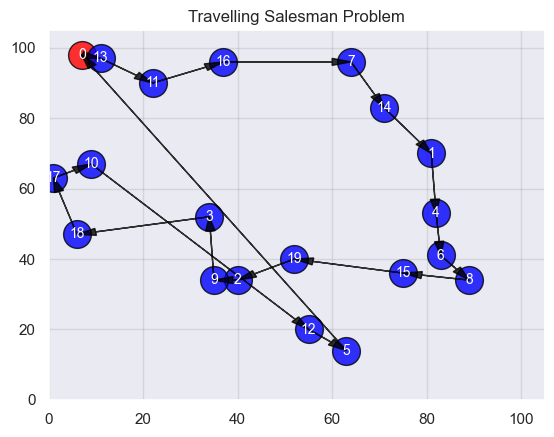

In [26]:
def main():
    nodes.clear()
    generate_map(x=MAX_X, y=MAX_Y)
    generate_nodes(numbers=NUMBER_OF_NODES)
    set_beginning_node(index=0)
    plot_nodes()
    optimal_route = get_optimal_route()
    print(optimal_route)
    plot_lines(route=optimal_route)

main()